In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
filepath=r'C:\Users\parim\Downloads\penguins_size.csv'
df=pd.read_csv(filepath)

In [3]:
df=df.dropna()

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [5]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [6]:
y=df['species']

In [7]:
from  sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)


In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [17]:
preds=rfc.predict(X_test)

In [19]:
# preds

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [23]:
cm=confusion_matrix(y_test,preds)

In [24]:
cm

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

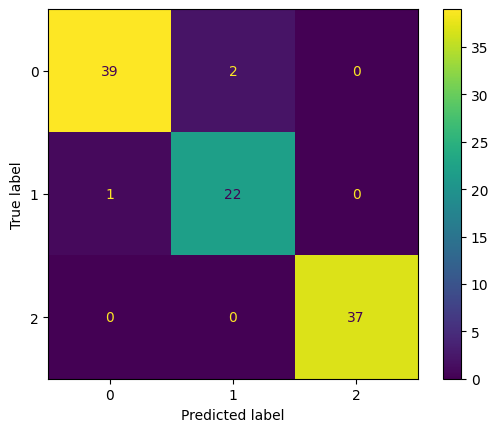

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [27]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [28]:
rfc.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])